# Binary Hopfield Network
This implements a Hopfield network and update rule for binary inputs. The approach is to first define such a network and plausible, non-random inputs, to find visualization options, and finally to train the network and visualize the training results.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,time,math,sys

import pandas as pd

from scipy.signal import resample,correlate

import networkx as nx

Uses the pre-implemented Hopfield Binary network:

In [2]:
sys.path.append('../../7_HELPERFUNCTIONS/')
from Networks.Hopfield import HopfieldBinary

## Configuration and base alphabet
Configuration of the number of nodes, and set of all available nodes as $2^{\text{#nodes}}$. Select subset and attach probabilities as data frame.

In [3]:
# Input and Output nodes
n_inputs = 5
n_outputs = 5
# Total number of nodes
n_nodes = n_inputs+n_outputs

# Available alphabet
base_set = 2*(np.array([list(binstr) for binstr in [bin(k)[2:].zfill(n_nodes) for k in range(2**n_nodes)]]).astype(int)-0.5)

In [4]:
# Size of subset of available alphabet
SUBSETSIZE = 9

# Available alphabet as Data Frame
di = pd.DataFrame(columns=['X','Pr(X)'])
di['X'] = list(base_set)

# Mix data frame
di = di.sample(frac=1).reset_index(drop=True)

# Select first/random entries, and attach corresponding probabilities
di.loc[:SUBSETSIZE,'Pr(X)'] = 1
di['Pr(X)'] = di['Pr(X)'].fillna(0)
di['Pr(X)'] = di['Pr(X)']/di['Pr(X)'].sum()

## Training & Test Sets
Generate training and test sets from randomly selected alphabet.

In [5]:
# Instantiate network
hopfield_nn = HopfieldBinary(n_nodes)

# Train and test sets
Xtrain = np.array([list(di.loc[k,'X']) for k in list(rnd.choice(di.index.tolist(),p=di['Pr(X)'].tolist(),size=1000))])
Xtest = np.array([list(di.loc[k,'X']) for k in list(rnd.choice(di.index.tolist(),p=di['Pr(X)'].tolist(),size=100))])

# Train network
hopfield_nn.train(Xtrain)

## Visualize resulting network
Create NetworkX graph from edge weight matrix and visualize closely connected nodes from weight matrix heatmap.

In [6]:
# NX graph
G = nx.from_numpy_array(hopfield_nn.W)

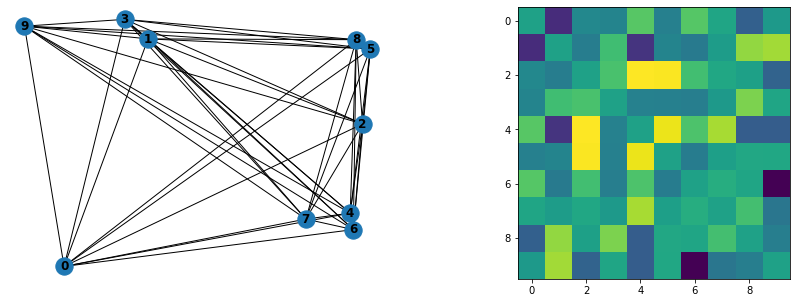

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

nx.draw(G, with_labels=True, font_weight='bold',ax=ax[0])
ax[1].imshow(hopfield_nn.W)

plt.show()

## Test network
Using the test set, see what the network settles into when given partial inputs.